In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
%matplotlib inline
np.random.seed(27)
rcParams['figure.figsize'] = 10, 6
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

In [3]:
def generate_model_report(y_actual, y_predicted):
    print("Accuracy = " , accuracy_score(y_actual, y_predicted))
    print("Precision = " ,precision_score(y_actual, y_predicted))
    print("Recall = " ,recall_score(y_actual, y_predicted))
    print("F1 Score = " ,f1_score(y_actual, y_predicted))
    pass

In [4]:
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test,  y_pred_proba)
    auc = roc_auc_score(Y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="AUC ROC Curve with Area Under the curve ="+str(auc))
    plt.legend(loc=4)
    plt.show()
    pass

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
target = 'Class'

In [8]:
X = df.loc[:, df.columns!=target]

In [9]:
Y = df.loc[:, df.columns==target]

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)

0    284315
1       492
Name: Class, dtype: int64


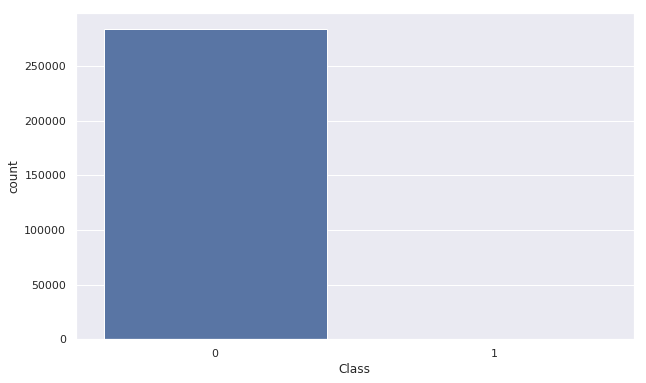

In [11]:
ax = sns.countplot(x=target, data=df)
print(df[target].value_counts())

In [12]:
100* (492/float(df.shape[0]))

0.1727485630620034

In [13]:
100* (284315/float(df.shape[0]))

99.82725143693798

In [14]:
Y_train[target].value_counts()

0    190477
1       343
Name: Class, dtype: int64

In [15]:
clf = LogisticRegression().fit(X_train, Y_train)

In [16]:
Y_Test_Pred = clf.predict(X_test)

In [18]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93800,78
1,38,71


In [19]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9987657867577431
Precision =  0.6513761467889908
Recall =  0.47651006711409394
F1 Score =  0.5503875968992248


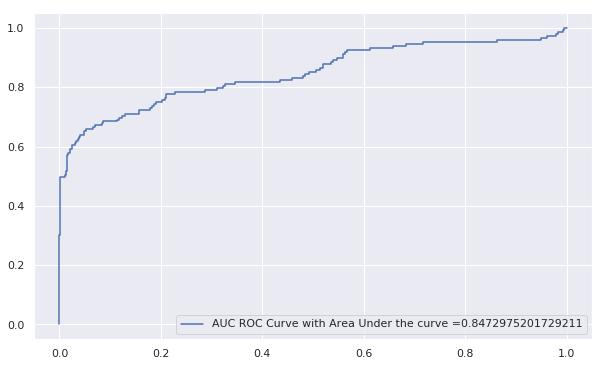

In [20]:
generate_auc_roc_curve(clf, X_test)

# class_weight='balanced'

<img src="./class_weight_inp_image.png">

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [21]:
unique_classes = list(df[target].unique())
unique_classes

[0, 1]

In [26]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[df[target] == classes].shape[0])
                                     *len(unique_classes))

In [23]:
out_dict

{0: 0.5008652375006595, 1: 289.4380081300813}

In [24]:
print (X_train.shape, Y_train.shape)

(190820, 30) (190820, 1)


In [27]:
clf = LogisticRegression(class_weight='balanced').fit(X_train, Y_train)

In [28]:
from sklearn.utils import class_weight

In [29]:
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train[target])

array([  0.50090037, 278.16326531])

In [30]:
Y_Test_Pred = clf.predict(X_test)

In [31]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,91548,13
1,2290,136


In [32]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9754966112334684
Precision =  0.05605935696619951
Recall =  0.912751677852349
F1 Score =  0.10563106796116506


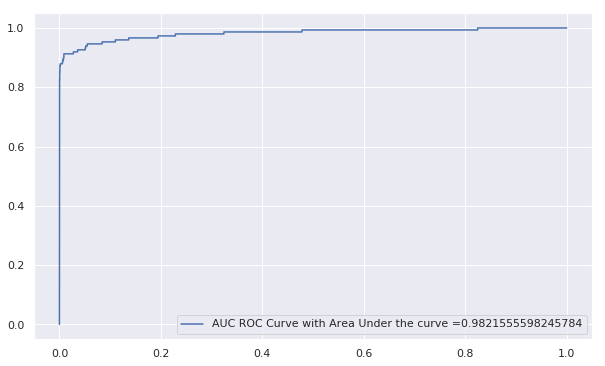

In [33]:
generate_auc_roc_curve(clf, X_test)

In [34]:
weights = np.linspace(0.05, 0.95, 20)
gsc = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'class_weight': [{0: x, 1: 1.0-x} for x in weights]
    },
    scoring='f1',
    cv=5
)

grid_result = gsc.fit(X_train, Y_train)
print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'class_weight': {0: 0.09736842105263158, 1: 0.9026315789473685}}


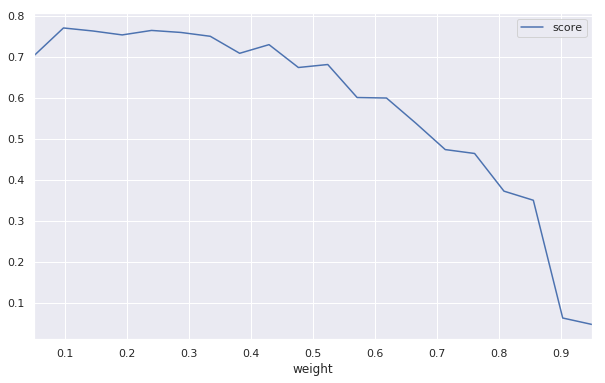

In [35]:
data_out = pd.DataFrame({'score': grid_result.cv_results_['mean_test_score'],
                       'weight': weights })
data_out.plot(x='weight')

In [36]:
data_out

,score,weight
0,0.703298,0.050000
1,0.770741,0.097368
2,0.763401,0.144737
3,0.753784,0.192105
4,0.764725,0.239474
5,0.759793,0.286842
6,0.750428,0.334211
7,0.708962,0.381579
8,0.730055,0.428947
9,0.674311,0.476316


In [37]:
clf = LogisticRegression(**grid_result.best_params_).fit(X_train, Y_train)

In [38]:
Y_Test_Pred = clf.predict(X_test)

In [39]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93791,30
1,47,119


In [40]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9991807377616053
Precision =  0.7168674698795181
Recall =  0.7986577181208053
F1 Score =  0.7555555555555555


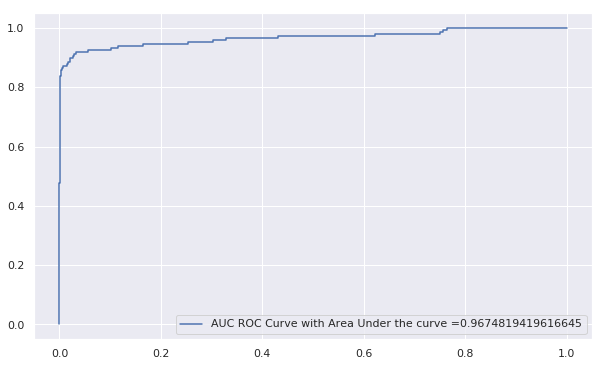

In [41]:
generate_auc_roc_curve(clf, X_test)

# SMOTE

In [42]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 190477, 1: 343}

In [43]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [44]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 190477, 1: 190477}

In [45]:
clf = LogisticRegression().fit(x_train_res, y_train_res)

In [46]:
Y_Test_Pred = clf.predict(X_test)

In [47]:
pd.crosstab(Y_Test_Pred, Y_test[target], rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,92303,14
1,1535,135


In [48]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9835189973081384
Precision =  0.08083832335329341
Recall =  0.9060402684563759
F1 Score =  0.148433205057724


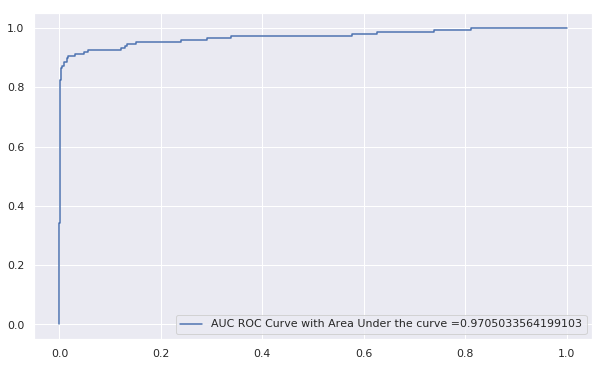

In [49]:
generate_auc_roc_curve(clf, X_test)

In [50]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

Best parameters : {'smote__ratio': 0.005}


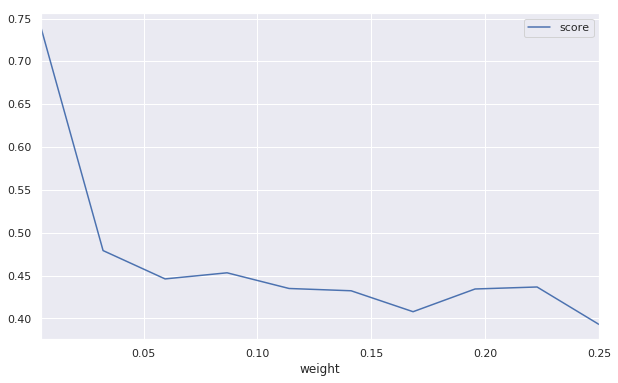

In [51]:
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)

weights = np.linspace(0.005, 0.25, 10)

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        'smote__ratio': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X_train, Y_train)

print("Best parameters : %s" % grid_result.best_params_)
weight_f1_score_df = pd.DataFrame({ 'score': grid_result.cv_results_['mean_test_score'],
                                   'weight': weights })
weight_f1_score_df.plot(x='weight')

In [52]:
pipe = make_pipeline(
    SMOTE(ratio=0.005),
    LogisticRegression()
)

pipe.fit(X_train, Y_train)

Y_Test_Pred = pipe.predict(X_test)

In [53]:
pd.crosstab(Y_Test_Pred, Y_test[target], 
            rownames=['Predicted'], colnames=['Actual'])

Actual,0,1
Predicted,,
0,93798,41
1,40,108


In [54]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9991381786842861
Precision =  0.7297297297297297
Recall =  0.7248322147651006
F1 Score =  0.7272727272727273


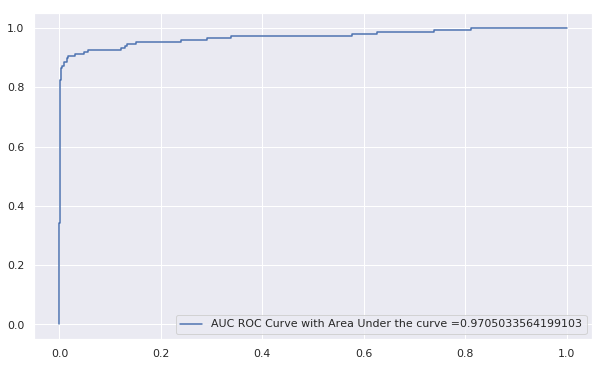

In [55]:
generate_auc_roc_curve(clf, X_test)

# UNDERSAMPLING

In [56]:
minority_class_len = len(df[df[target] == 1])
print(minority_class_len)

492


In [57]:
majority_class_indices = df[df[target] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [58]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

492


In [59]:
minority_class_indices = df[df[target] == 1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [60]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [61]:
under_sample = df.loc[under_sample_indices]

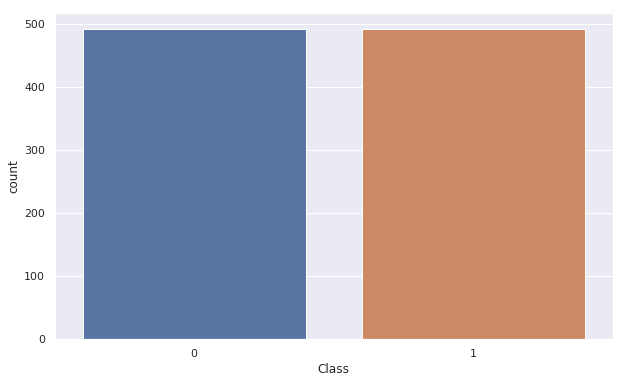

In [62]:
sns.countplot(x=target, data=under_sample)

In [63]:
X = under_sample.loc[:, df.columns!=target]
Y = under_sample.loc[:, df.columns==target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
clf = LogisticRegression().fit(X_train, Y_train)
Y_Test_Pred = clf.predict(X_test)

In [64]:
generate_model_report(Y_test, Y_Test_Pred)

Accuracy =  0.9323076923076923
Precision =  0.9863013698630136
Recall =  0.8780487804878049
F1 Score =  0.9290322580645162


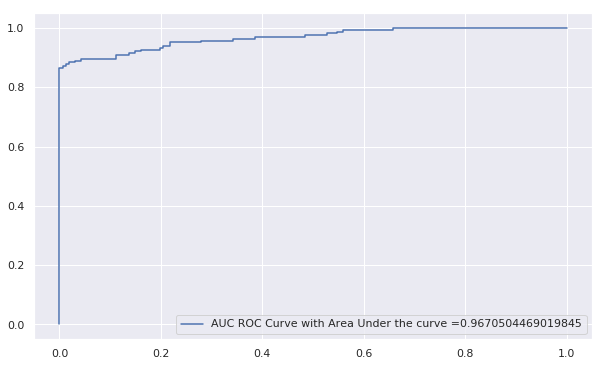

In [65]:
generate_auc_roc_curve(clf, X_test)